In [13]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数
from  sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix # 回帰問題における性能評価に関する関数import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #3D散布図の描画

csv読み込み

In [3]:
df_fuels = pd.read_csv("measurements.csv")

display(df_fuels.head())

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,E10,0,0,0,NaN,NaN


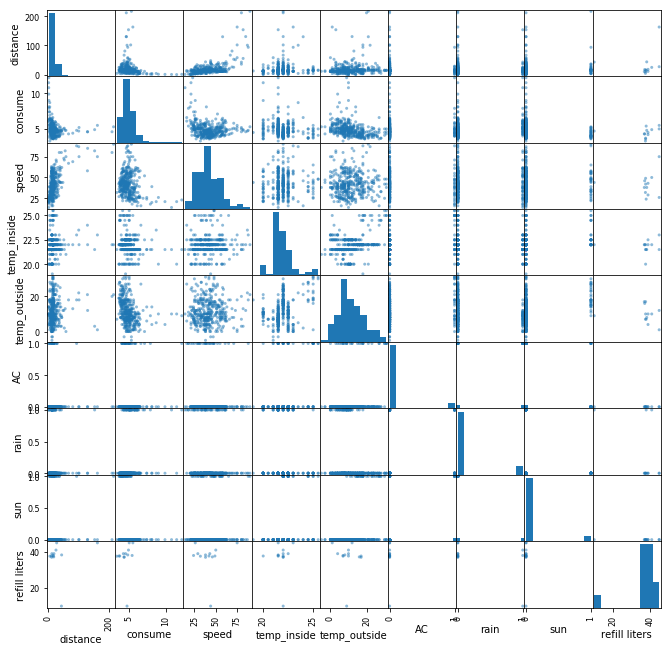

In [6]:
pd.plotting.scatter_matrix(df_fuels, figsize=(11, 11))
plt.show()

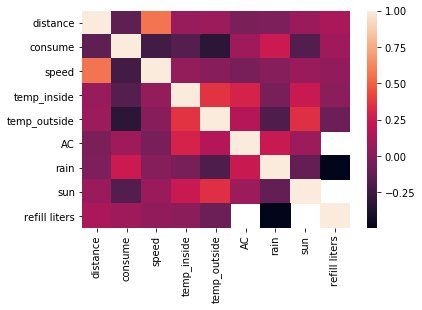

In [9]:
sns.heatmap(df_fuels.corr())

distanceとspeedを説明変数とする

In [10]:
y = df_fuels["consume"].values
X = df_fuels[["distance", "speed"]].values
regr = LinearRegression(fit_intercept=True)
regr.fit(X, y)

w0 = regr.intercept_
w1 = regr.coef_[0]
w2 = regr.coef_[1]

In [11]:
x1 = df_fuels["distance"]
x2 = df_fuels["speed"]
y = df_fuels["consume"]

y_est = w0 + w1 * x1 + w2 * x2
squared_error = 0.5 * np.sum((y - y_est) ** 2)
print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, 二乗誤差 = {:.3f}'.format(w0, w1, w2, squared_error))

w0 = 5.637, w1 = -0.000, w2 = -0.017, 二乗誤差 = 195.825


w0 = 5.637, w1 = -0.000, w2 = -0.017, 二乗誤差 = 195.825


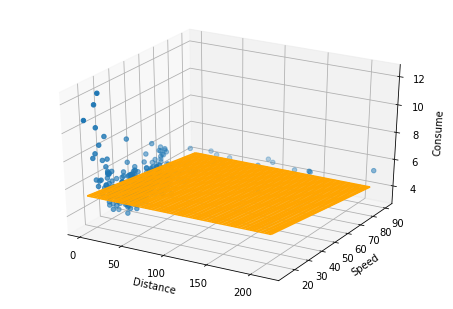

In [12]:
y_est = w0 + w1 * x1 + w2 * x2
squared_error = 0.5 * np.sum((y - y_est) ** 2)
print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, 二乗誤差 = {:.3f}'.format(w0, w1, w2, squared_error))

# 作図の設定
fig = plt.figure()
ax = Axes3D(fig)

# 軸の設定
ax.set_xlabel("Distance")
ax.set_ylabel("Speed")
ax.set_zlabel("Consume")

# プロット
ax.scatter3D(x1, x2 ,y)

# 直線のプロット
x1 = np.arange(min(x1), max(x1), (max(x1) - min(x1)) / 100)
x2 = np.arange(min(x2), max(x2), (max(x2) - min(x2)) / 100)
x1, x2 = np.meshgrid(x1, x2)
y_est = w0 + w1 * x1 + w2 * x2
ax.plot_wireframe(x1, x2, y_est, color="orange")
plt.show()